## To make india a big and more important part of the global economy it is a necessary step to support local brands in India , 'Vocal for Local' . Not only should products be 'made in India' but the promotuon of these products should take place so as to make those products competitive.

## In this project I choose the different comments and feedbacks of indian brands like Amazon to do sentimental analysing. Reviews generates a lot of data-that can be analysed for advertising, business purpose,understanding customers needs and wishes

In [1]:
import pandas as pd 
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud , ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob

In [2]:
data=pd.read_csv('amazon_vfl_reviews.csv')
data

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...
...,...,...,...,...,...
2777,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-03-01,5,Long lasting freshness throughout the day.
2778,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-10-24,5,My preferred soap
2779,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-10-03,2,ठीक नहीं लगा
2780,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-06-21,4,Super Product


In [3]:
data.shape

(2782, 5)

## The dataset containing 2782 rows and 5 column
  * **asin----> a unique number of each product**
  * **name-----> name of the product**
  * **date------> data on which the reviews were posted**
  * **rating----> rating of the product out of 5**
  * **review-----> customer's review to the product**

# data cleaning


In [4]:
data.isnull().sum()

asin      0
name      0
date      0
rating    0
review    4
dtype: int64

####  here we are getting 4 null values on review column so we'll drop them

In [5]:
data.dropna(inplace=True)
data=data.reset_index()
data=data.drop(['index'], axis=1)
data

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...
...,...,...,...,...,...
2773,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-03-01,5,Long lasting freshness throughout the day.
2774,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-10-24,5,My preferred soap
2775,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-10-03,2,ठीक नहीं लगा
2776,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-06-21,4,Super Product


In [6]:
data.shape

(2778, 5)

In [7]:
data.isnull().sum()

asin      0
name      0
date      0
rating    0
review    0
dtype: int64

#### now there is no null review

In [8]:
## unique product

len(data['name'].unique())

122

#### here 122 products are unique now we are going to extract brand name from the product

In [9]:
data['name']

0       Mamaearth-Onion-Growth-Control-Redensyl
1       Mamaearth-Onion-Growth-Control-Redensyl
2       Mamaearth-Onion-Growth-Control-Redensyl
3       Mamaearth-Onion-Growth-Control-Redensyl
4       Mamaearth-Onion-Growth-Control-Redensyl
                         ...                   
2773              Mysore-Sandal-Soaps-Pack-Bars
2774              Mysore-Sandal-Soaps-Pack-Bars
2775              Mysore-Sandal-Soaps-Pack-Bars
2776              Mysore-Sandal-Soaps-Pack-Bars
2777              Mysore-Sandal-Soaps-Pack-Bars
Name: name, Length: 2778, dtype: object

In [10]:
data['name'].sample(n=5)

201           Godrej-Protekt-Master-Blaster-Handwash
2464    Reflex-Activity-Tracker-Monitor-SWD90066PP01
33        Mamaearth-Percent-Natural-Berry-Toothpaste
176                       Mamaearth-Face-Wash-100-ml
1385                 Cinthol-Original-Soap-100g-Pack
Name: name, dtype: object

In [11]:
def brand_name(x):
    return x.split('-')[0]
data['brand']=data['name'].apply(brand_name)

In [12]:
data['brand']

0       Mamaearth
1       Mamaearth
2       Mamaearth
3       Mamaearth
4       Mamaearth
          ...    
2773       Mysore
2774       Mysore
2775       Mysore
2776       Mysore
2777       Mysore
Name: brand, Length: 2778, dtype: object

In [13]:
data['brand'].unique()

array(['Mamaearth', 'Godrej', 'Titan', 'Maaza', 'Paper', 'Indiana',
       'Coca', 'Natural', 'Maggi', 'Glucon', 'Amul', 'Patanjali',
       'PATANJALI', 'Dettol', 'Savlon', 'Cinthol', 'Britannia',
       'NutriChoice', 'Streax', 'Himalaya', 'Society', 'Tata', 'Fastrack',
       'Reflex', 'MYSORE', 'Mysore'], dtype=object)

In [14]:
len(data['brand'].unique())

26

#### we can see inconsistency in brands like PATANJALI and patanjai and MYSORE and mysore they all are same . so we will remove it

In [15]:
data['brand'] = data['brand'].replace('PATANJALI' , 'Patanjali')
data['brand'] = data['brand'].replace('MYSORE' , 'Mysore')

In [16]:
data['brand'].unique()

array(['Mamaearth', 'Godrej', 'Titan', 'Maaza', 'Paper', 'Indiana',
       'Coca', 'Natural', 'Maggi', 'Glucon', 'Amul', 'Patanjali',
       'Dettol', 'Savlon', 'Cinthol', 'Britannia', 'NutriChoice',
       'Streax', 'Himalaya', 'Society', 'Tata', 'Fastrack', 'Reflex',
       'Mysore'], dtype=object)

In [17]:
len(data['brand'].unique())

24

#### now we have a list of total 24 indian brands


## how much review each brand got

In [18]:
df1 = pd.DataFrame(data.groupby('brand')['asin'].count().reset_index())
df1.columns=['brand','count']
sort_data = df1.sort_values(['count'],ascending=True)

fig = px.bar(sort_data.iloc[:],y='brand',x='count',
             orientation='h',color='count')
fig.update_layout(title_text='reviews of different uniques brands',title_x=0.5,
                  template='plotly_dark')
fig.show()

### now we plot table and see which brand has got least reviews and which brand got highest review 

### TOP 5 most number of review

In [19]:

brand = sort_data.iloc[-5:,:]['brand'].tolist()
count=sort_data.iloc[-5:,:]['count'].tolist()

fig = go.Figure(data=[go.Table(header=dict(values=['Brand','Number of Reviews'],
                                          fill_color='blue',
                                           height=30),
                 cells=dict(values=[brand,count],
                            height=30))
                     ])
fig.update_layout(title_text='Top 5 Names of brands with most number of reviews',title_x=0.5,
                  template='plotly_dark')
fig.show()

###  himaaya , godrej , cinthol, mamaearth , titan they have most number of reviews

In [20]:
brand = sort_data.iloc[:8,:]['brand'].tolist()
count=sort_data.iloc[:8,:]['count'].tolist()

fig = go.Figure(data=[go.Table(header=dict(values=['Brand','Number of Reviews'],
                                          fill_color='blue',
                                           height=30),
                 cells=dict(values=[brand,count],
                            height=30))
                     ])
fig.update_layout(title_text='Top 8 Names of brands with least number of reviews',title_x=0.5,
                  template='plotly_dark')
fig.show()

### we can see the indiana , nutrichoice has least number of reviews

## wordcloud total reviews

In [21]:
stop_words=stopwords.words('english')

corpus=[]
for i in range (0,len(data)):
    text = re.sub('[^a-zA-Z]', ' ', data['review'][i])
    text=text.lower()
    text=text.split()
    text=[word for word in text if not word in stop_words]
    text=' '.join(text)
    corpus.append(text)

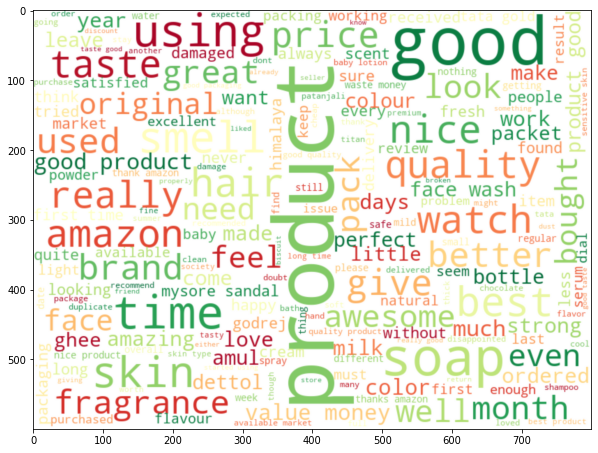

In [22]:
word_cloud=WordCloud(width = 800,
                       height = 600,
                       colormap = 'RdYlGn', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'white').generate(' '.join(corpus))



plt.figure(figsize = (10, 10))
plt.imshow(word_cloud ,interpolation = 'gaussian')
plt.axis('on')
plt.show()


## distribution of ratings

In [23]:
rating_count=pd.DataFrame(data['rating'].value_counts().reset_index())
rating_count.columns=['rating','count']

fig=px.bar(rating_count,x='rating',y='count',
          color='count')
fig.update_layout(title_text='distribution of ratings',title_x=0.5,
                 template='plotly_dark')
fig.show()


## from the above graph we can see that----->
* **almost 1444 prducts has got 5 ratings**
* **460 products got 4 ratings**
* **198 products got 3 ratings**
* **130 products got 2 ratings**
* **546 products got 1 ratings**

# Sentiment Analysis

### TextBlob-----> here we are using TextBlobs (pythin library for proceeding data) to sentiment analyse on product reviews.

* **for calculating sentiment we use polarity whic lies between (-1 to +1)**
 * **here -1 indicates negative sentiment**
      * **+1 is indicates positive sentiment**
           * **0 indicates neutral**

In [24]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

data['polarity_score'] = data['review'].\
   apply(lambda x : polarity(x))

def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'
    
data['polarity'] = data['polarity_score'].\
   map(lambda x: sentiment(x))

In [25]:
fig = go.Figure(data=[go.Pie(labels=data['polarity'].value_counts().index.tolist(),
                             values=data['polarity'].value_counts().tolist(),
                            marker=dict(colors=['blue','yellow','white']))])

fig.update_layout(title_text='Proportion of Sentiments',title_x=0.5,
                  template='plotly_dark')
fig.show()

* **most of reviews is positive(76.8%)**
* **14.8% review is negative**
* **8.42% review is neutral**


In [26]:
def get_data(data,senti):
    s_data = data[data['polarity']==senti].reset_index()
    
    s_corpus = []
    for i in range(0,len(s_data)):
        text = re.sub('[^a-zA-Z]', ' ', s_data['review'][i])
        text = text.lower()
        text = text.split()
        text = [word for word in text if not word in stop_words]
        text = ' '.join(text)
        s_corpus.append(text)
    return s_corpus

positive_corpus = get_data(data,'positive')
negative_corpus = get_data(data,'negative')
neutral_corpus = get_data(data,'neutral')

## positive sentiment

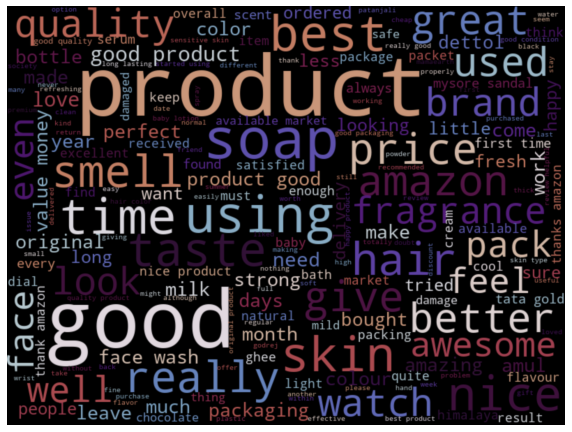

In [27]:
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'twilight_shifted_r', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(positive_corpus))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'gaussian')
plt.axis('off')
plt.show()

## Negative sentiment

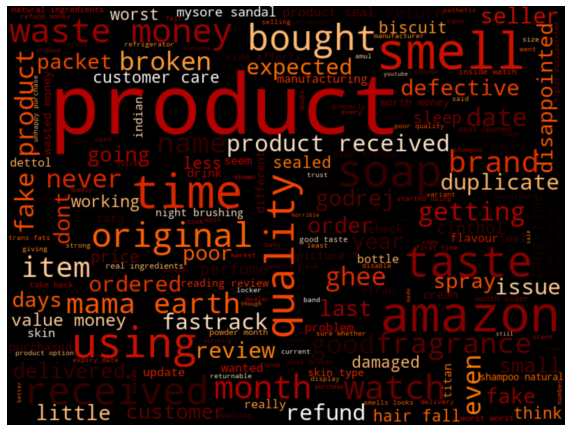

In [28]:
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'gist_heat_r', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(negative_corpus))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'gaussian')
plt.axis('off')
plt.show()

## neutral sentiments

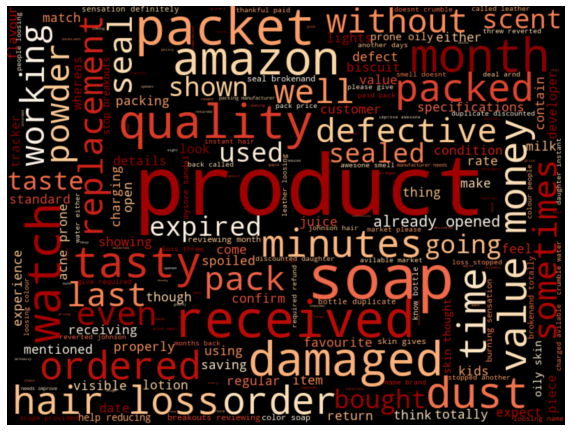

In [29]:
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'OrRd', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(neutral_corpus))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'gaussian')
plt.axis('off')
plt.show()

## TWO MODELS:
   * **XGBOOST CLASSIFIER**
        * **LOGISTIC REGRESSION**

In [30]:

from sklearn.linear_model import LogisticRegression



In [31]:
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
class Xgb:
    def _pipeline(self, data):
        cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
        review = data[['review']]
        Xtrain, Xtest, ytrain, ytest = train_test_split(review, data.rating, random_state=2)
        cv.fit(pd.concat([Xtrain.review, Xtest.review]))
        Xtrain = cv.transform(Xtrain.review)
        Xtest  = cv.transform(Xtest.review)

        model = XGBClassifier()
        model.fit(Xtrain, ytrain)
        
        ypred = model.predict(Xtest)
        print("Xgboost classifier accuracy score: ", accuracy_score(ytest, ypred))
                             
Xgb()._pipeline(data)

[12:49:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost classifier accuracy score:  0.8647482014388489


In [32]:
from xgboost import XGBClassifier

class Xgb:
    def _pipeline(self, data):
        cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
        review = data[['review']]
        Xtrain, Xtest, ytrain, ytest = train_test_split(review, data.rating, random_state=2)
        cv.fit(pd.concat([Xtrain.review, Xtest.review]))
        Xtrain = cv.transform(Xtrain.review)
        Xtest  = cv.transform(Xtest.review)

        
        model=LogisticRegression()
        model.fit(Xtrain, ytrain)
        
        ypred = model.predict(Xtest)
        
        print("logistic regression accuracy score:",accuracy_score(ytest, ypred))
                             
Xgb()._pipeline(data)

logistic regression accuracy score: 0.879136690647482


## the two models are running sucesfully . logistic regression model has highest accuracy score as 87.91%

